# GHANA GRUMP CENTROID

In [1]:
import os

# set working directory
cwd = os.getcwd()
os.chdir('/Users/cascade/Github/NightTimeLightsAfrica/data/raw/grumpdata/Centroids/gpw-v4-admin-unit-center-points-population-estimates-rev10_gha_csv/')

print(cwd)

/Users/cascade/Github/NightTimeLightsAfrica/notebooks/jupyter


In [2]:
import csv
import pandas as pd
import numpy as np

ghana = pd.read_csv('gpw_v4_admin_unit_center_points_population_estimates_rev10_gha.csv')

In [3]:
ghana_pop = pd.concat([ghana.NAME2, ghana.CENTROID_X, ghana.CENTROID_Y, ghana.UN_2000_E, 
                        ghana.UN_2005_E, ghana.UN_2010_E, ghana.UN_2015_E,
                        ghana.UN_2020_E], axis = 1)

In [4]:
pd.DataFrame.sum(ghana_pop)

NAME2         ATEBUBU AMANTINBAWKU MUNICIPALSEKONDI TAKORADI...
CENTROID_X                                               -189.4
CENTROID_Y                                              1230.14
UN_2000_E                                              18824994
UN_2005_E                                              21389515
UN_2010_E                                              24317733
UN_2015_E                                              27409894
UN_2020_E                                              30530454
dtype: object

In [5]:
# Group by district
dist_2000_tot = ((ghana.groupby('NAME2')['UN_2000_E'].sum())) 
dist_2020_tot = ((ghana.groupby('NAME2')['UN_2020_E'].sum())) 

In [6]:
dist_0020_df = pd.concat([dist_2000_tot, dist_2020_tot], axis=1)
dist_0020_df.columns = ['dist_2000', 'dist_2020']
dist_0020_df['totchng_0020'] = dist_0020_df.dist_2020 - dist_0020_df.dist_2000
dist_0020_df['totpct_0020'] = dist_0020_df.totchng_0020 / dist_0020_df.dist_2000 *100
dist_0020_df['NAME2'] = dist_0020_df.index
dist_0020_df['pctchng_dtotchng'] = (dist_0020_df.dist_2020 - dist_0020_df.dist_2000) / [30530454-18824994] * 100 #<-- contribution to total change

### This opens a wierd question - if Lusaka makes over 20% pct change out of total change ... is that from natural increase???

In [7]:
dist_0020_df[60:90]

,dist_2000,dist_2020,totchng_0020,totpct_0020,NAME2,pctchng_dtotchng
NAME2,,,,,,
EFFUTU MUNICIPAL,48216,89767,41551,86.176788,EFFUTU MUNICIPAL,0.354971
EJISU JUABEN MUNICIPAL,123604,153798,30194,24.428012,EJISU JUABEN MUNICIPAL,0.257948
EJURA SEKYE DUMASI,80741,83173,2432,3.012100,EJURA SEKYE DUMASI,0.020777
ELLEMBELLE,83893,83945,52,0.061984,ELLEMBELLE,0.000444
EWUTU SENYA,137277,255580,118303,86.178311,EWUTU SENYA,1.010665
FANTEAKWA,85757,126530,40773,47.544807,FANTEAKWA,0.348325
GA EAST MUNICIPAL,182516,339806,157290,86.178746,GA EAST MUNICIPAL,1.343732
GA WEST MUNICIPAL,184677,343828,159151,86.178030,GA WEST MUNICIPAL,1.359630
GARU TEMPANE,114567,135688,21121,18.435501,GARU TEMPANE,0.180437


/anaconda3/lib/python3.7/site-packages/ggplot/ggplot.py:420: FutureWarning: 'NAME2' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  return mappers, data.groupby(groups)


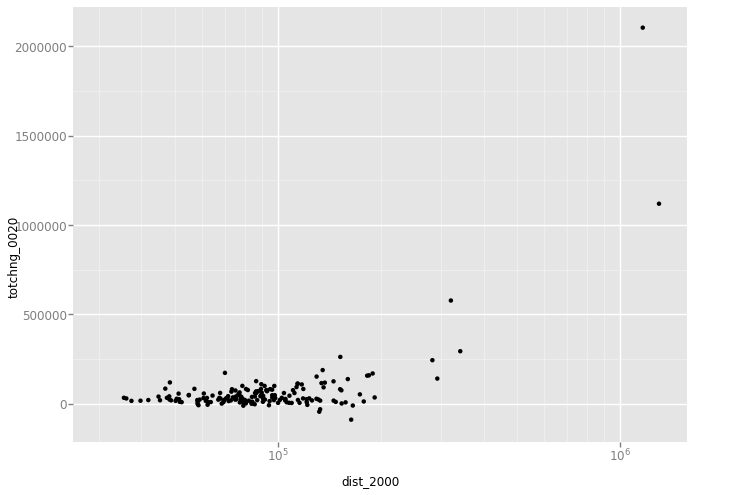

<ggplot: (7543086070)>

In [16]:
from ggplot import *
ggplot(aes(x='dist_2000', y='totchng_0020', label = 'NAME2'), data=dist_0020_df) +\
    geom_point() +\
    scale_x_log()